In [25]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import tensorboard as tb

import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
from matplotlib import pyplot as plt
from scipy import stats
import tbparser

# reading in / writing results to df's

In [26]:
from tbparser.summary_reader import SummaryReader

ModuleNotFoundError: No module named 'tbparser.summary_reader'

In [13]:
def get_results(tensorboard_file, train_tags, test_tags, valid_tags):
    results = []
    ## validation results 
    reader = SummaryReader(tensorboard_file, tag_filter=valid_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "valid"]
        results.append(datapoint)
    
    ## train results 
    reader = SummaryReader(tensorboard_file, tag_filter=train_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "train"]
        results.append(datapoint)
    
    ## test results 
    reader = SummaryReader(tensorboard_file, tag_filter=test_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "test"]
        results.append(datapoint)
    
    results_df = pd.DataFrame(results, columns=['tag', 'epoch', 'value', 'run_name', 'stage'])
    return results_df

In [18]:
path = "/app/timeseries/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.1-2"
train_tags = ['train/train_loss']
test_tags = ['test/test_loss']
valid_tags = ['val/valid_loss']
log_df = get_results(tensorboard_file=path, train_tags=train_tags, test_tags=test_tags, valid_tags=valid_tags)
print(log_df.shape)

NameError: name 'SummaryReader' is not defined

In [10]:
# Approx F1: Balanced 
path = '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/balanced/approx-f1-reg-'
prefix = "approx-f1-reg-"
approx_f1_df = get_results(path=path, prefix=prefix, baseline=False)
print(approx_f1_df.shape)

# Approx F1: Balanced Run #2 
path = '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/balanced/run2-1024-approx-f1-reg-'
prefix = "run2-1024-approx-f1-reg-"
approx_f1_df_2 = get_results(path=path, prefix=prefix, baseline=False)
print(approx_f1_df_2.shape)

(412148, 5)
(272459, 5)


In [11]:
# CE: Imbalanced 
path = '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/imbalanced/1024-baseline-imb-'
prefix = "1024-baseline-imb-"
ce_imb_df = get_results(path=path, prefix=prefix, baseline=True)
print(ce_imb_df.shape)

# CE: Imbalanced Run #2 
path = '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/imbalanced/run2-1024-baseline-imb-'
prefix = "run2-1024-baseline-imb-"
ce_imb_df_run2 = get_results(path=path, prefix=prefix, baseline=True)
print(ce_imb_df_run2.shape)

(370073, 5)
(397562, 5)


In [124]:
# Approx F1: Imbalanced 
path = '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/imbalanced/1024-approx-f1-imb-'
prefix = "1024-approx-f1-imb-"
approx_f1_imb_df = get_results(path=path, prefix=prefix, baseline=False)
print(approx_f1_imb_df.shape)

# Approx F1: Imbalanced Run #2 
path = '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/imbalanced/run2-1024-approx-f1-imb-'
prefix = "run2-1024-approx-f1-imb-"
approx_f1_imb_df = get_results(path=path, prefix=prefix, baseline=False)
print(approx_f1_imb_df.shape)

(301257, 5)


In [125]:
# Adjusted Approx F1: Imbalanced 
path = '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/imbalanced/1024-approx-f1-imb-wt-'
prefix = "1024-approx-f1-imb-wt-"
adj_approx_f1_imb_df = get_results(path=path, prefix=prefix, baseline=False)
print(adj_approx_f1_imb_df.shape)

(305558, 5)


In [126]:
print(ce_df.shape)
print(approx_f1_df.shape)
print(ce_imb_df.shape)
print(approx_f1_imb_df.shape)
print(adj_approx_f1_imb_df.shape)

(411400, 5)
(412148, 5)
(370073, 5)
(301257, 5)
(305558, 5)


In [127]:
approx_f1_imb_df.head()

,tag,epoch,value,run_name,stage
0,val/accuracy,0,0.086000,1024-approx-f1-imb-0,validation
1,val/micro-f1,0,0.086000,1024-approx-f1-imb-0,validation
2,val/macro-f1,0,0.035099,1024-approx-f1-imb-0,validation
3,val/w-f1,0,0.035078,1024-approx-f1-imb-0,validation
4,val/class-0-f1,0,0.000000,1024-approx-f1-imb-0,validation


sanity check: need to check that for a certain tag, we have varying values (to make sure that our experiment ran normally) 

In [128]:
approx_f1_imb_df.loc[(approx_f1_imb_df['tag'] == "val/class-0-f1") & \
                    (approx_f1_imb_df['epoch'] == 100)]['value'].std()

0.01209738616403142

In [129]:
approx_f1_imb_df.loc[(approx_f1_imb_df['tag'] == "val/class-0-f1") & \
                    (approx_f1_imb_df['epoch'] == 100)]['value'].mean()

0.5108580857515335

given that the values above are nonzero, we do have variance given the different seeds. 

In [130]:
# sorting values 
ce_df = ce_df.sort_values(by=['tag', 'epoch'])
ce_df = ce_df.groupby(['tag', 'epoch'])['value'].mean().reset_index()

approx_f1_df = approx_f1_df.sort_values(by=['tag', 'epoch'])
approx_f1_df = approx_f1_df.groupby(['tag', 'epoch'])['value'].mean().reset_index()

ce_imb_df = ce_imb_df.sort_values(by=['tag', 'epoch'])
ce_imb_df = ce_imb_df.groupby(['tag', 'epoch'])['value'].mean().reset_index()

approx_f1_imb_df = approx_f1_imb_df.sort_values(by=['tag', 'epoch'])
approx_f1_imb_df = approx_f1_imb_df.groupby(['tag', 'epoch'])['value'].mean().reset_index()

adj_approx_f1_imb_df = adj_approx_f1_imb_df.sort_values(by=['tag', 'epoch'])
adj_approx_f1_imb_df = adj_approx_f1_imb_df.groupby(['tag', 'epoch'])['value'].mean().reset_index()

In [131]:
print(ce_df.shape)
print(approx_f1_df.shape)
print(ce_imb_df.shape)
print(approx_f1_imb_df.shape)
print(adj_approx_f1_imb_df.shape)

(61897, 3)
(61523, 3)
(45815, 3)
(38522, 3)
(41140, 3)


# looking at distribution of training 

the evaluation (test loader)'s distribution is spread evenly, when looking at eval runs. in the code, i mistakenly had been adding to the test_dxn every time, but it reflects roughly the same proportion of how much our distribution was trained on. in addition to this, the validation distribution is accurate. 

In [139]:
with open('/Users/taesoodaniellee/Documents/heaviside/multiclass_src/results/results1024.json') as json_file:
    data = json.load(json_file)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/taesoodaniellee/Documents/heaviside/multiclass_src/results/results1024.json'

# balanced: baseline (ce) to approx-f1

In [165]:
def compare(baseline_df, approx_f1_df, metric, balanced): 
    df = baseline_df.loc[baseline_df['tag'] == metric]
    df1 = approx_f1_df.loc[approx_f1_df['tag'] == metric]
    print("baseline: {}".format(df.tail(1)))
    print("approx: {}".format(df1.tail(1)))
    baseline_val = df.tail(1)['value'].item()
    approx_val = df1.tail(1)['value'].item()
    plt.plot('epoch', 'value', data=df, label="baseline")
    plt.plot('epoch', 'value', data=df1, label="approx-f1")
    
    if balanced: 
        title = "balanced " + metric 
    else: 
        title = "imbalanced " + metric 
    plt.title(title)
    plt.legend()
    plt.show()
    return baseline_val, approx_val

baseline:             tag  epoch    value
61896  val/w-f1    330  0.60053
approx:             tag  epoch     value
61522  val/w-f1    328  0.616912


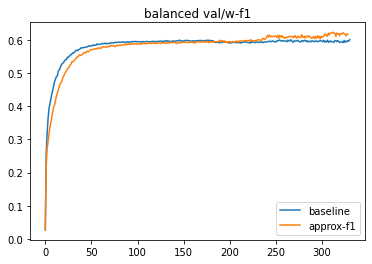

baseline:                 tag  epoch     value
61234  val/macro-f1    330  0.599987
approx:                 tag  epoch     value
60864  val/macro-f1    328  0.614394


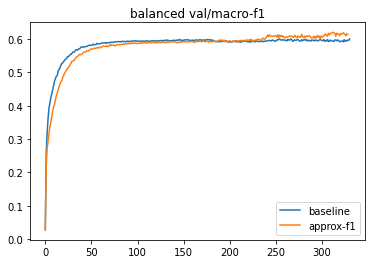

baseline:                 tag  epoch   value
61565  val/micro-f1    330  0.6012
approx:                 tag  epoch   value
61193  val/micro-f1    328  0.6124


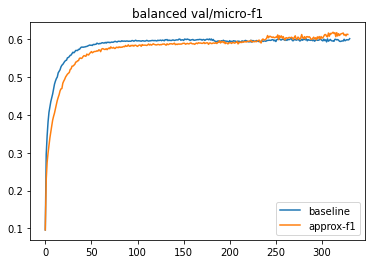

(0.6011999845504761, 0.6123999953269958)

In [166]:
compare(ce_df, approx_f1_df, metric="val/w-f1", balanced=True)
compare(ce_df, approx_f1_df, metric="val/macro-f1", balanced=True)
compare(ce_df, approx_f1_df, metric="val/micro-f1", balanced=True)

baseline:              tag  epoch     value
24824  test/w-f1    330  0.600165
approx:              tag  epoch     value
24674  test/w-f1    328  0.606231


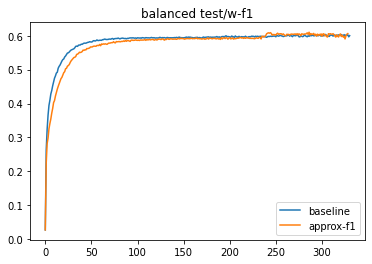

baseline:                  tag  epoch     value
24162  test/macro-f1    330  0.600165
approx:                  tag  epoch     value
24016  test/macro-f1    328  0.606231


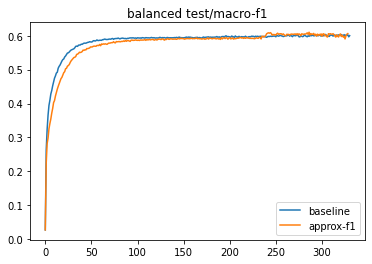

baseline:                  tag  epoch   value
24493  test/micro-f1    330  0.6015
approx:                  tag  epoch   value
24345  test/micro-f1    328  0.6034


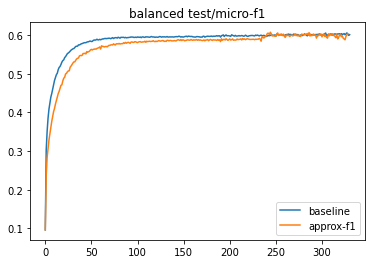

In [109]:
compare(ce_df, approx_f1_df, metric="test/w-f1", balanced=True)
compare(ce_df, approx_f1_df, metric="test/macro-f1", balanced=True)
compare(ce_df, approx_f1_df, metric="test/micro-f1", balanced=True)

looking at classwise f1 for validation + test 

baseline:                   tag  epoch     value
39388  val/class-0-f1    330  0.666667
approx:                   tag  epoch     value
39150  val/class-0-f1    328  0.669246


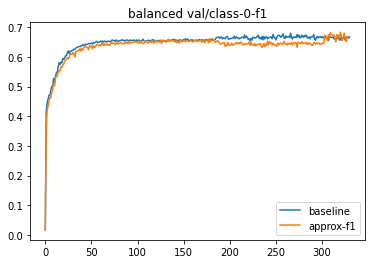

baseline:                   tag  epoch     value
41705  val/class-1-f1    330  0.709552
approx:                   tag  epoch     value
41453  val/class-1-f1    328  0.744136


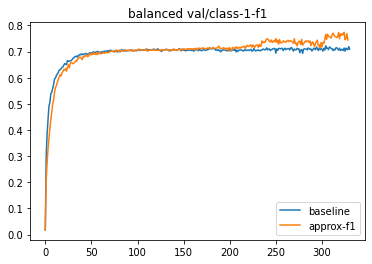

baseline:                   tag  epoch     value
44022  val/class-2-f1    330  0.477838
approx:                   tag  epoch     value
43756  val/class-2-f1    328  0.515672


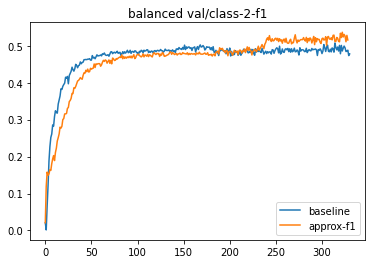

baseline:                   tag  epoch     value
46339  val/class-3-f1    330  0.386249
approx:                   tag  epoch    value
46059  val/class-3-f1    328  0.39005


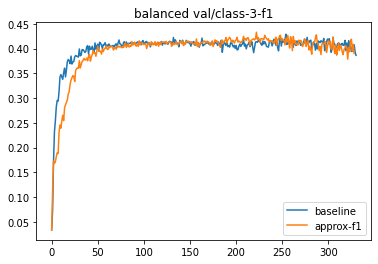

baseline:                   tag  epoch     value
48656  val/class-4-f1    330  0.528827
approx:                   tag  epoch     value
48362  val/class-4-f1    328  0.545291


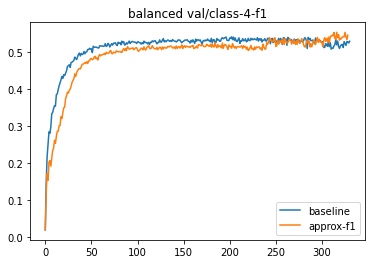

baseline:                   tag  epoch     value
50973  val/class-5-f1    330  0.501424
approx:                   tag  epoch     value
50665  val/class-5-f1    328  0.522704


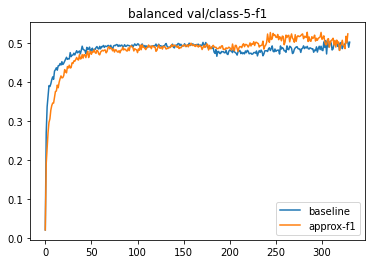

baseline:                   tag  epoch     value
53290  val/class-6-f1    330  0.641624
approx:                   tag  epoch     value
52968  val/class-6-f1    328  0.675403


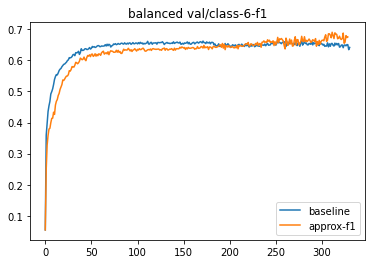

baseline:                   tag  epoch     value
55607  val/class-7-f1    330  0.657426
approx:                   tag  epoch     value
55271  val/class-7-f1    328  0.677454


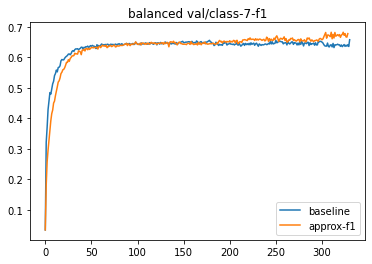

baseline:                   tag  epoch     value
57924  val/class-8-f1    330  0.764306
approx:                   tag  epoch    value
57574  val/class-8-f1    328  0.74898


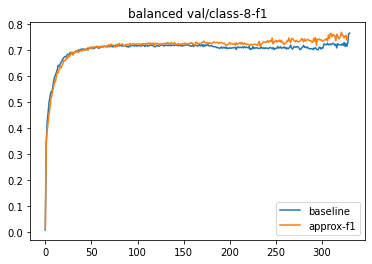

baseline:                   tag  epoch     value
60241  val/class-9-f1    330  0.665957
approx:                   tag  epoch     value
59877  val/class-9-f1    328  0.655005


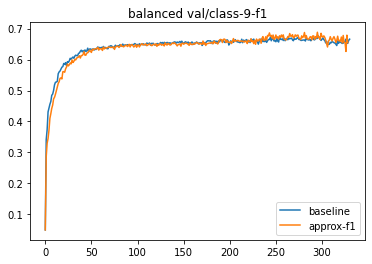

In [135]:
for i in range(10): 
    metric = "test/class-" + str(i) + "-f1"
    compare(ce_df, approx_f1_df, metric=metric, balanced=True)

approx loses here for classes 8 and 9 (classes 9 and 10) 

baseline:                   tag  epoch     value
39388  val/class-0-f1    330  0.666667
approx:                   tag  epoch     value
39150  val/class-0-f1    328  0.669246


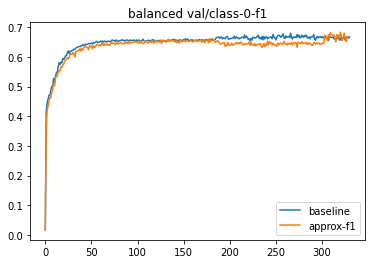

baseline:                   tag  epoch     value
41705  val/class-1-f1    330  0.709552
approx:                   tag  epoch     value
41453  val/class-1-f1    328  0.744136


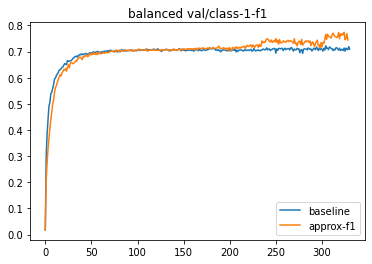

baseline:                   tag  epoch     value
44022  val/class-2-f1    330  0.477838
approx:                   tag  epoch     value
43756  val/class-2-f1    328  0.515672


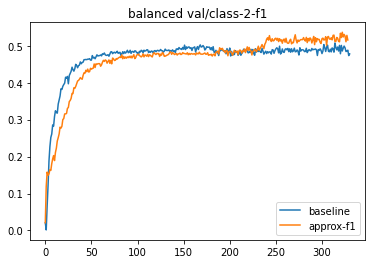

baseline:                   tag  epoch     value
46339  val/class-3-f1    330  0.386249
approx:                   tag  epoch    value
46059  val/class-3-f1    328  0.39005


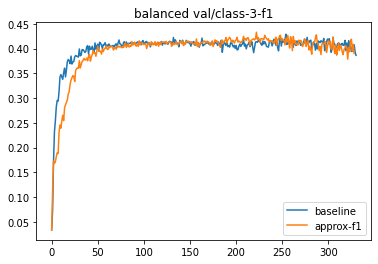

baseline:                   tag  epoch     value
48656  val/class-4-f1    330  0.528827
approx:                   tag  epoch     value
48362  val/class-4-f1    328  0.545291


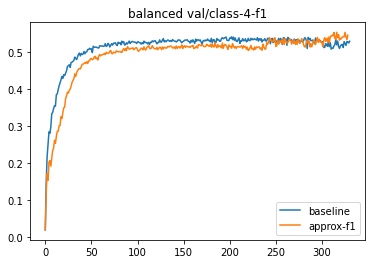

baseline:                   tag  epoch     value
50973  val/class-5-f1    330  0.501424
approx:                   tag  epoch     value
50665  val/class-5-f1    328  0.522704


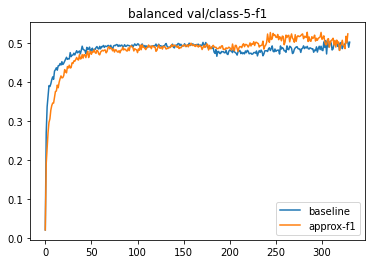

baseline:                   tag  epoch     value
53290  val/class-6-f1    330  0.641624
approx:                   tag  epoch     value
52968  val/class-6-f1    328  0.675403


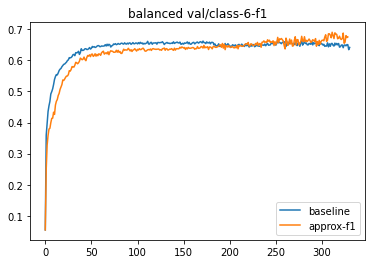

baseline:                   tag  epoch     value
55607  val/class-7-f1    330  0.657426
approx:                   tag  epoch     value
55271  val/class-7-f1    328  0.677454


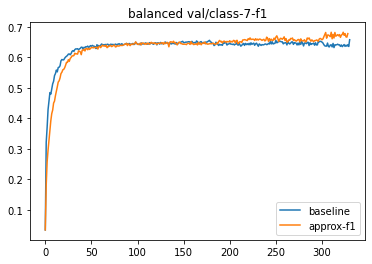

baseline:                   tag  epoch     value
57924  val/class-8-f1    330  0.764306
approx:                   tag  epoch    value
57574  val/class-8-f1    328  0.74898


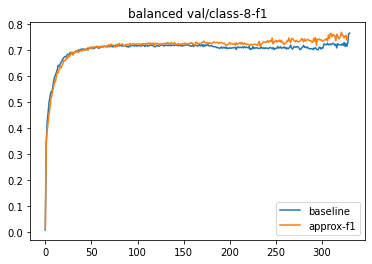

baseline:                   tag  epoch     value
60241  val/class-9-f1    330  0.665957
approx:                   tag  epoch     value
59877  val/class-9-f1    328  0.655005


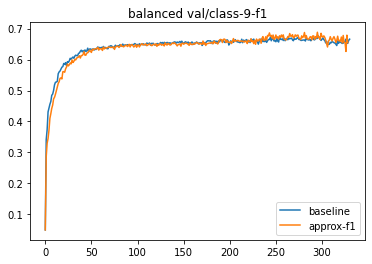

In [136]:
for i in range(10): 
    metric = "val/class-" + str(i) + "-f1"
    compare(ce_df, approx_f1_df, metric=metric, balanced=True)

looking at classwise precision and recall for validation + test 

baseline:                          tag  epoch     value
39719  val/class-0-precision    330  0.662188
approx:                          tag  epoch     value
39479  val/class-0-precision    328  0.660305


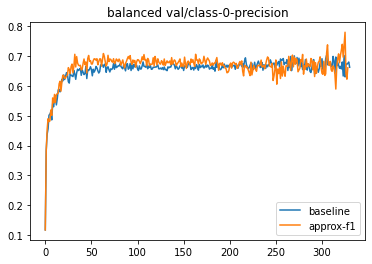

baseline:                          tag  epoch     value
42036  val/class-1-precision    330  0.686792
approx:                          tag  epoch     value
41782  val/class-1-precision    328  0.762009


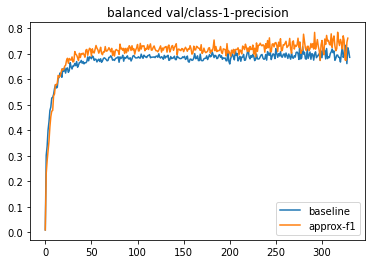

baseline:                          tag  epoch     value
44353  val/class-2-precision    330  0.556675
approx:                          tag  epoch     value
44085  val/class-2-precision    328  0.524691


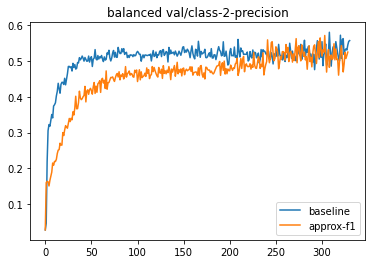

baseline:                          tag  epoch     value
46670  val/class-3-precision    330  0.366603
approx:                          tag  epoch     value
46388  val/class-3-precision    328  0.366355


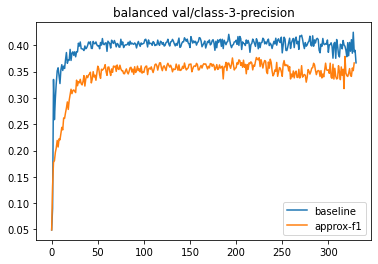

baseline:                          tag  epoch     value
48987  val/class-4-precision    330  0.516505
approx:                          tag  epoch     value
48691  val/class-4-precision    328  0.504146


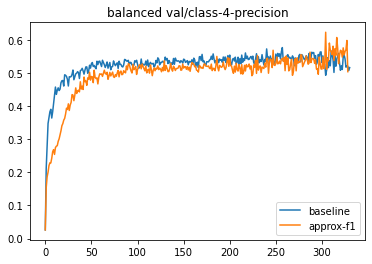

baseline:                          tag  epoch     value
51304  val/class-5-precision    330  0.511628
approx:                          tag  epoch     value
50994  val/class-5-precision    328  0.491461


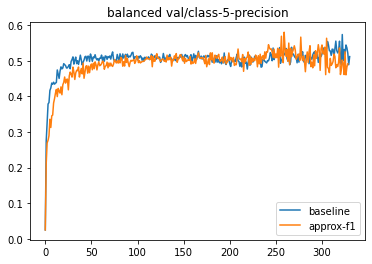

baseline:                          tag  epoch     value
53621  val/class-6-precision    330  0.622047
approx:                          tag  epoch     value
53297  val/class-6-precision    328  0.717345


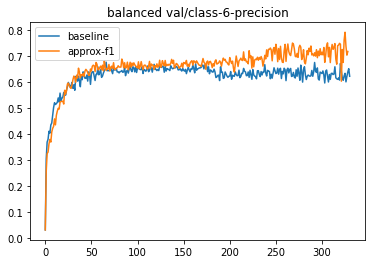

baseline:                          tag  epoch    value
55938  val/class-7-precision    330  0.65873
approx:                          tag  epoch     value
55600  val/class-7-precision    328  0.744076


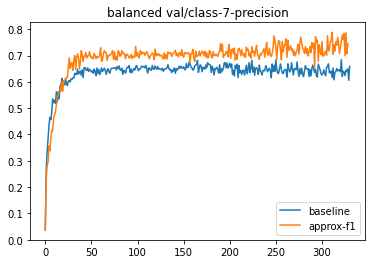

baseline:                          tag  epoch    value
58255  val/class-8-precision    330  0.79596
approx:                          tag  epoch     value
57903  val/class-8-precision    328  0.811947


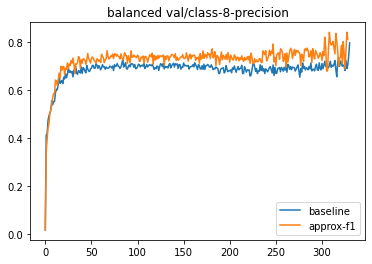

baseline:                          tag  epoch     value
60572  val/class-9-precision    330  0.634888
approx:                          tag  epoch     value
60206  val/class-9-precision    328  0.640684


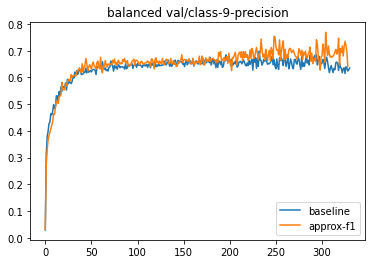

In [150]:
for i in range(10): 
    metric = "val/class-" + str(i) + "-precision"
    compare(ce_df, approx_f1_df, metric=metric, balanced=True)
    metric = "val/class-" + str(i) + "-recall"

# imbalanced: baseline vs. approx-f1 

In [141]:
print(ce_df.shape)
print(approx_f1_df.shape)
print(ce_imb_df.shape)
print(approx_f1_imb_df.shape)
print(adj_approx_f1_imb_df.shape)

(61897, 3)
(61523, 3)
(45815, 3)
(38522, 3)
(41140, 3)


In [167]:
def compare(baseline_df, approx_f1_df, metric, balanced): 
    df = baseline_df.loc[baseline_df['tag'] == metric]
    df1 = approx_f1_df.loc[approx_f1_df['tag'] == metric]
    print("baseline: {}".format(df.tail(1)))
    print("approx: {}".format(df1.tail(1)))
    baseline_val = df.tail(1)['value'].item()
    approx_val = df1.tail(1)['value'].item()
    plt.plot('epoch', 'value', data=df, label="baseline")
    plt.plot('epoch', 'value', data=df1, label="approx-f1")
    
    if balanced: 
        title = "balanced " + metric 
    else: 
        title = "imbalanced " + metric 
    plt.title(title)
    plt.legend()
    plt.show()
    return baseline_val, approx_val

baseline:              tag  epoch     value
18374  test/w-f1    244  0.446407
approx:              tag  epoch     value
15449  test/w-f1    205  0.436021


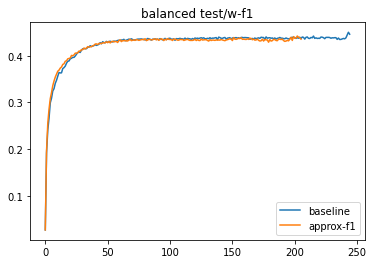

baseline:                  tag  epoch     value
17884  test/macro-f1    244  0.446407
approx:                  tag  epoch     value
15037  test/macro-f1    205  0.436021


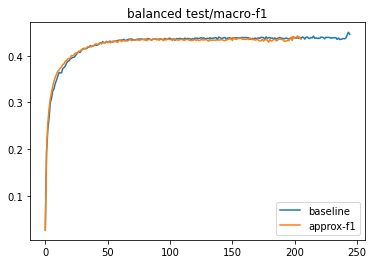

baseline:                  tag  epoch   value
18129  test/micro-f1    244  0.4539
approx:                  tag  epoch   value
15243  test/micro-f1    205  0.4331


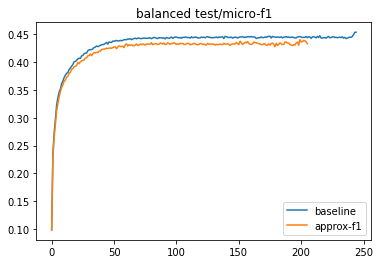

In [144]:
compare(ce_imb_df, approx_f1_imb_df, metric="test/w-f1", balanced=False)
compare(ce_imb_df, approx_f1_imb_df, metric="test/macro-f1", balanced=False)
compare(ce_imb_df, approx_f1_imb_df, metric="test/micro-f1", balanced=False)

baseline:             tag  epoch     value
45814  val/w-f1    244  0.491042
approx:             tag  epoch     value
38521  val/w-f1    205  0.497074


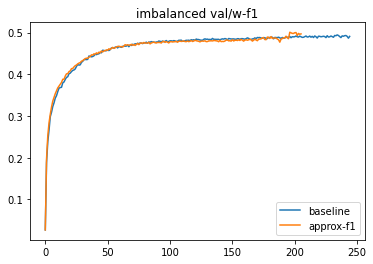

baseline:                 tag  epoch     value
45324  val/macro-f1    244  0.491062
approx:                 tag  epoch     value
38109  val/macro-f1    205  0.498198


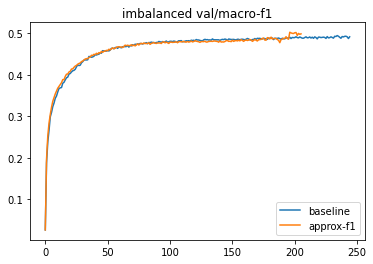

baseline:                 tag  epoch   value
45569  val/micro-f1    244  0.4942
approx:                 tag  epoch   value
38315  val/micro-f1    205  0.4896


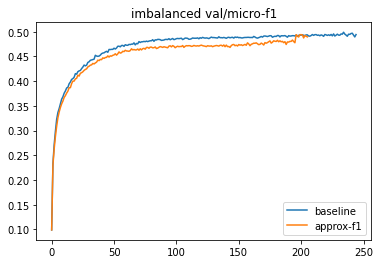

In [146]:
compare(ce_imb_df, approx_f1_imb_df, metric="val/w-f1", balanced=False)
compare(ce_imb_df, approx_f1_imb_df, metric="val/macro-f1", balanced=False)
compare(ce_imb_df, approx_f1_imb_df, metric="val/micro-f1", balanced=False)

## class-wise f1 scores 

baseline:                   tag  epoch     value
1714  test/class-0-f1    244  0.543222
approx:                   tag  epoch     value
1441  test/class-0-f1    205  0.526264


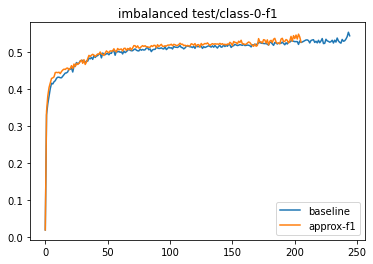

baseline:                   tag  epoch     value
3429  test/class-1-f1    244  0.540776
approx:                   tag  epoch     value
2883  test/class-1-f1    205  0.538717


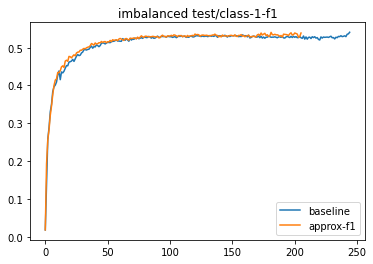

baseline:                   tag  epoch    value
5144  test/class-2-f1    244  0.37033
approx:                   tag  epoch     value
4325  test/class-2-f1    205  0.329529


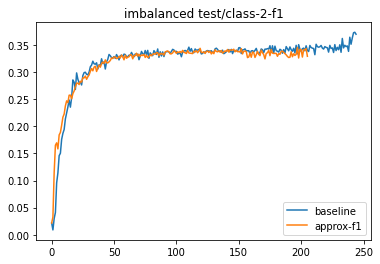

baseline:                   tag  epoch     value
6859  test/class-3-f1    244  0.326512
approx:                   tag  epoch     value
5767  test/class-3-f1    205  0.311678


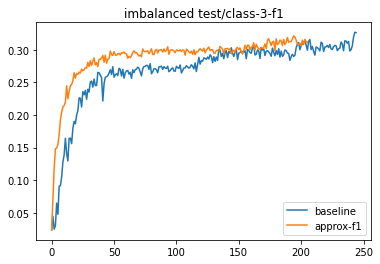

baseline:                   tag  epoch     value
8574  test/class-4-f1    244  0.398402
approx:                   tag  epoch     value
7209  test/class-4-f1    205  0.347349


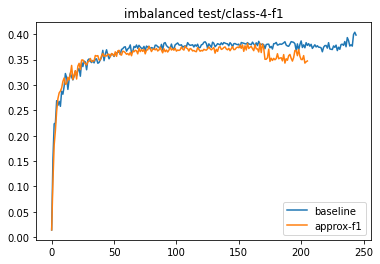

baseline:                    tag  epoch     value
10289  test/class-5-f1    244  0.379967
approx:                   tag  epoch     value
8651  test/class-5-f1    205  0.363194


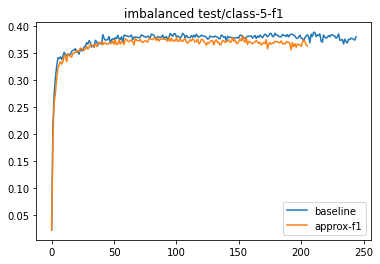

baseline:                    tag  epoch     value
12004  test/class-6-f1    244  0.501076
approx:                    tag  epoch     value
10093  test/class-6-f1    205  0.484974


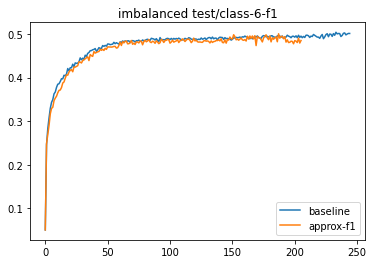

baseline:                    tag  epoch     value
13719  test/class-7-f1    244  0.483151
approx:                    tag  epoch     value
11535  test/class-7-f1    205  0.525013


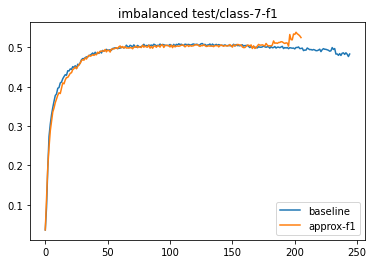

baseline:                    tag  epoch     value
15434  test/class-8-f1    244  0.577028
approx:                    tag  epoch     value
12977  test/class-8-f1    205  0.549142


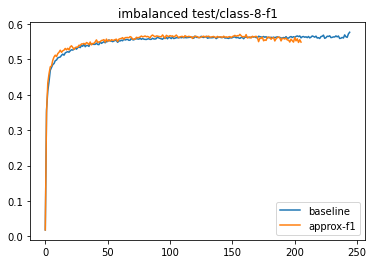

baseline:                    tag  epoch   value
17149  test/class-9-f1    244  0.3436
approx:                    tag  epoch     value
14419  test/class-9-f1    205  0.384351


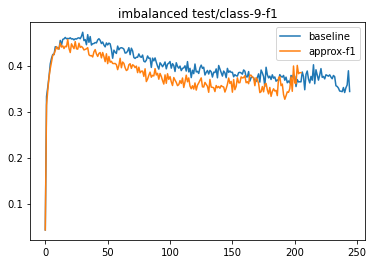

In [175]:
baseline, approx = [], [] 
for i in range(10): 
    metric = "test/class-" + str(i) + "-f1"
    b, a = compare(ce_imb_df, approx_f1_imb_df, metric=metric,balanced=False)
    baseline.append(round(b, 4))
    approx.append(round(a, 4))

In [177]:
print("baseline:", baseline)
print("approx:", approx)

baseline: [0.5432, 0.5408, 0.3703, 0.3265, 0.3984, 0.38, 0.5011, 0.4832, 0.577, 0.3436]
approx: [0.5263, 0.5387, 0.3295, 0.3117, 0.3473, 0.3632, 0.485, 0.525, 0.5491, 0.3844]


so it appears that the approximation does better for class 9 than ce when looking at the data fed in from the test loader. 

baseline:                   tag  epoch     value
29154  val/class-0-f1    244  0.520811
approx:                   tag  epoch     value
24513  val/class-0-f1    205  0.517103


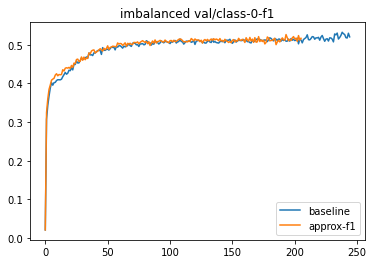

baseline:                   tag  epoch     value
30869  val/class-1-f1    244  0.578093
approx:                   tag  epoch     value
25955  val/class-1-f1    205  0.633094


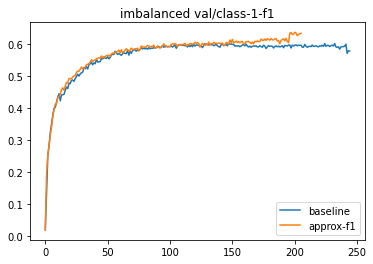

baseline:                   tag  epoch     value
32584  val/class-2-f1    244  0.371524
approx:                   tag  epoch  value
27397  val/class-2-f1    205  0.388


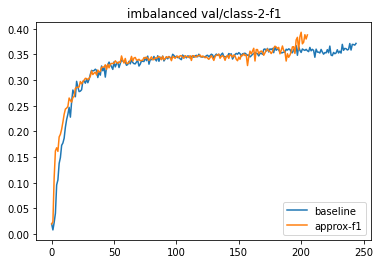

baseline:                   tag  epoch     value
34299  val/class-3-f1    244  0.317588
approx:                   tag  epoch     value
28839  val/class-3-f1    205  0.342669


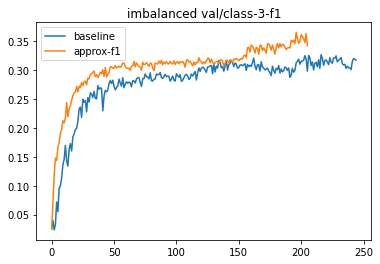

baseline:                   tag  epoch     value
36014  val/class-4-f1    244  0.405651
approx:                   tag  epoch     value
30281  val/class-4-f1    205  0.374194


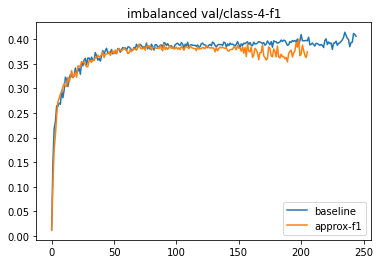

baseline:                   tag  epoch     value
37729  val/class-5-f1    244  0.365569
approx:                   tag  epoch     value
31723  val/class-5-f1    205  0.404175


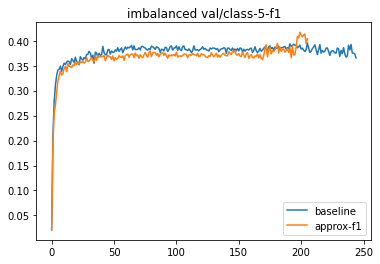

baseline:                   tag  epoch     value
39444  val/class-6-f1    244  0.510785
approx:                   tag  epoch     value
33165  val/class-6-f1    205  0.510053


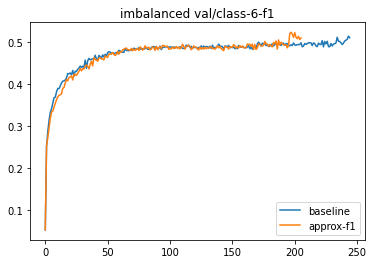

baseline:                   tag  epoch     value
41159  val/class-7-f1    244  0.473373
approx:                   tag  epoch     value
34607  val/class-7-f1    205  0.537988


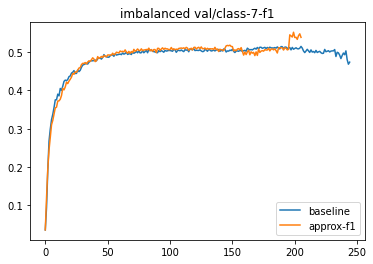

baseline:                   tag  epoch     value
42874  val/class-8-f1    244  0.588899
approx:                   tag  epoch     value
36049  val/class-8-f1    205  0.584971


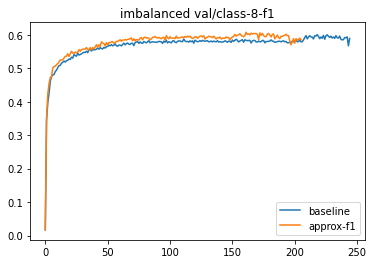

baseline:                   tag  epoch     value
44589  val/class-9-f1    244  0.778325
approx:                   tag  epoch     value
37491  val/class-9-f1    205  0.689732


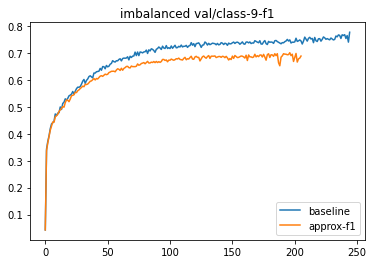

In [149]:
for i in range(10): 
    metric = "val/class-" + str(i) + "-f1"
    compare(ce_imb_df, approx_f1_imb_df, metric=metric,balanced=False)

## class-wise precision + recall scores 

baseline:                          tag  epoch     value
1959  test/class-0-precision    244  0.533784
approx:                          tag  epoch     value
1647  test/class-0-precision    205  0.516876


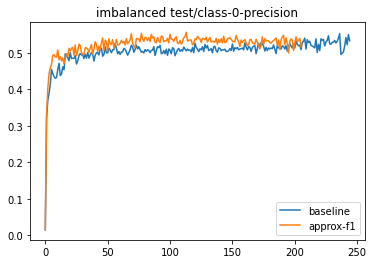

baseline:                       tag  epoch  value
2204  test/class-0-recall    244  0.553
approx:                       tag  epoch  value
1853  test/class-0-recall    205  0.536


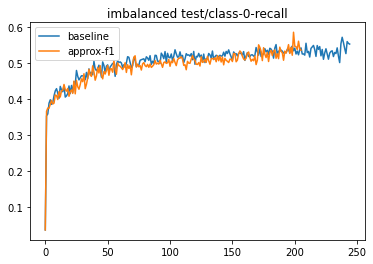

baseline:                          tag  epoch     value
3674  test/class-1-precision    244  0.479505
approx:                          tag  epoch     value
3089  test/class-1-precision    205  0.513122


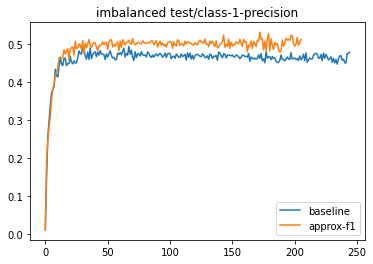

baseline:                       tag  epoch  value
3919  test/class-1-recall    244   0.62
approx:                       tag  epoch  value
3295  test/class-1-recall    205  0.567


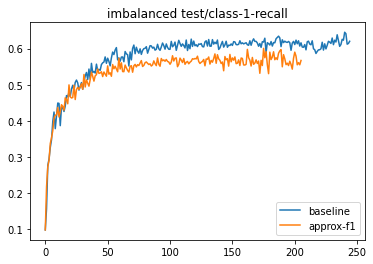

baseline:                          tag  epoch     value
5389  test/class-2-precision    244  0.403778
approx:                          tag  epoch     value
4531  test/class-2-precision    205  0.327094


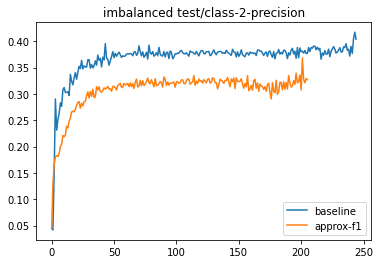

baseline:                       tag  epoch  value
5634  test/class-2-recall    244  0.342
approx:                       tag  epoch  value
4737  test/class-2-recall    205  0.332


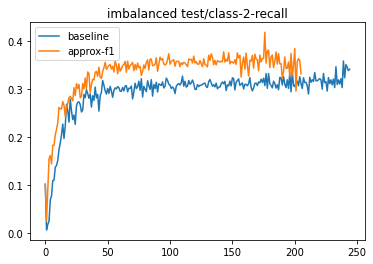

baseline:                          tag  epoch     value
7104  test/class-3-precision    244  0.305217
approx:                          tag  epoch     value
5973  test/class-3-precision    205  0.264665


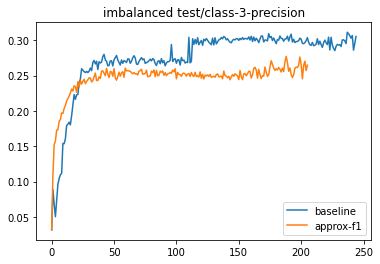

baseline:                       tag  epoch  value
7349  test/class-3-recall    244  0.351
approx:                       tag  epoch  value
6179  test/class-3-recall    205  0.379


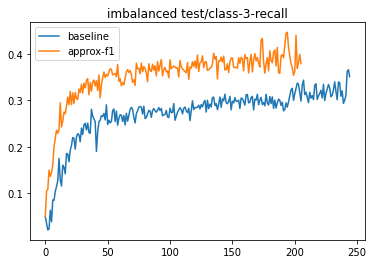

baseline:                          tag  epoch     value
8819  test/class-4-precision    244  0.464096
approx:                          tag  epoch     value
7415  test/class-4-precision    205  0.319865


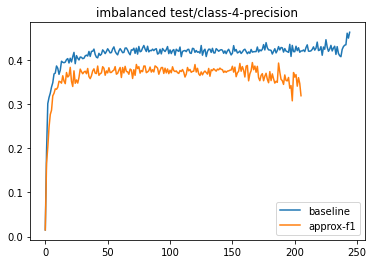

baseline:                       tag  epoch  value
9064  test/class-4-recall    244  0.349
approx:                       tag  epoch  value
7621  test/class-4-recall    205   0.38


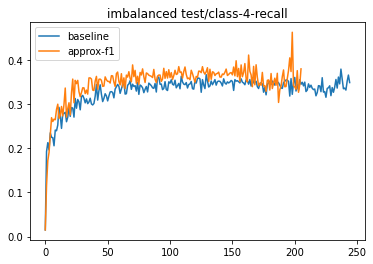

baseline:                           tag  epoch     value
10534  test/class-5-precision    244  0.416965
approx:                          tag  epoch    value
8857  test/class-5-precision    205  0.35389


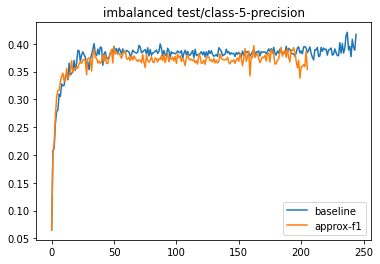

baseline:                        tag  epoch  value
10779  test/class-5-recall    244  0.349
approx:                       tag  epoch  value
9063  test/class-5-recall    205  0.373


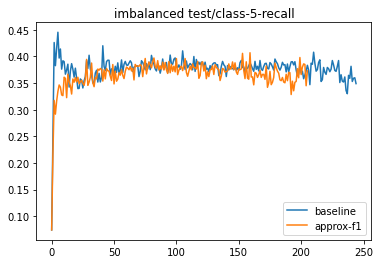

baseline:                           tag  epoch     value
12249  test/class-6-precision    244  0.439909
approx:                           tag  epoch     value
10299  test/class-6-precision    205  0.503226


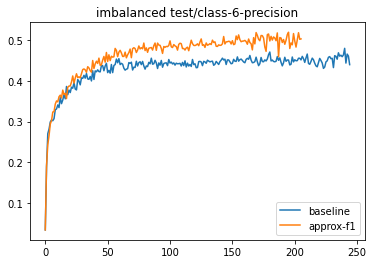

baseline:                        tag  epoch  value
12494  test/class-6-recall    244  0.582
approx:                        tag  epoch  value
10505  test/class-6-recall    205  0.468


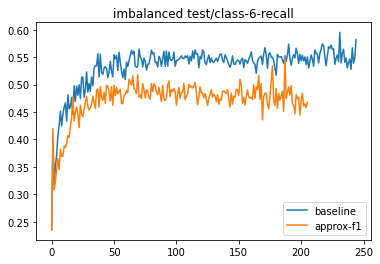

baseline:                           tag  epoch     value
13964  test/class-7-precision    244  0.459801
approx:                           tag  epoch     value
11741  test/class-7-precision    205  0.568102


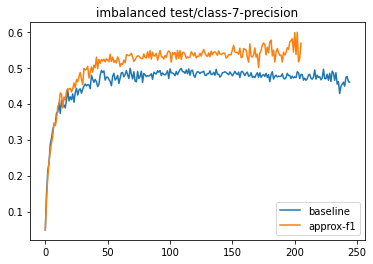

baseline:                        tag  epoch  value
14209  test/class-7-recall    244  0.509
approx:                        tag  epoch  value
11947  test/class-7-recall    205  0.488


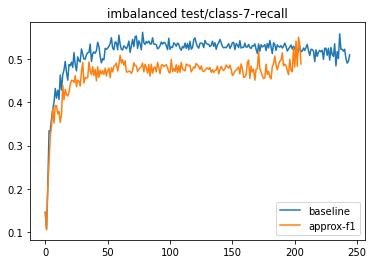

baseline:                           tag  epoch     value
15679  test/class-8-precision    244  0.530151
approx:                           tag  epoch     value
13183  test/class-8-precision    205  0.572048


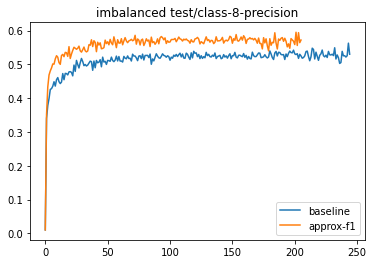

baseline:                        tag  epoch  value
15924  test/class-8-recall    244  0.633
approx:                        tag  epoch  value
13389  test/class-8-recall    205  0.528


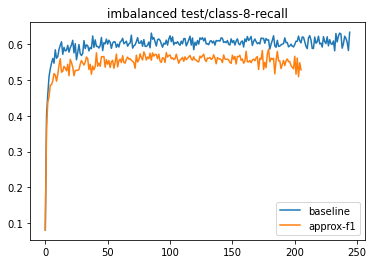

baseline:                           tag  epoch     value
17394  test/class-9-precision    244  0.544469
approx:                           tag  epoch     value
14625  test/class-9-precision    205  0.612691


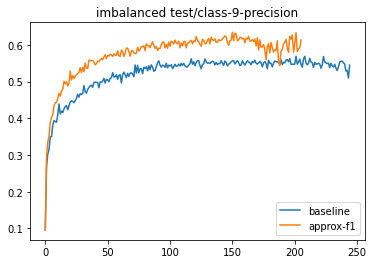

baseline:                        tag  epoch  value
17639  test/class-9-recall    244  0.251
approx:                        tag  epoch  value
14831  test/class-9-recall    205   0.28


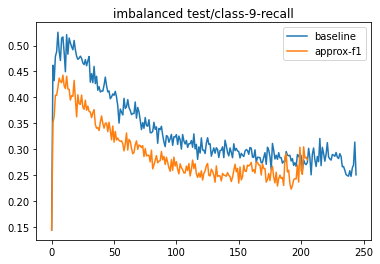

In [153]:
for i in range(10): 
    metric = "test/class-" + str(i) + "-precision"
    compare(ce_imb_df, approx_f1_imb_df, metric=metric,balanced=False)
    metric = "test/class-" + str(i) + "-recall"
    compare(ce_imb_df, approx_f1_imb_df, metric=metric,balanced=False)

# imbalanced: baseline vs. new approx-f1 

## class-wise f1 scores

baseline:                   tag  epoch     value
1203  test/class-0-f1    171  0.497795
approx:                   tag  epoch     value
1672  test/class-0-f1    238  0.327189


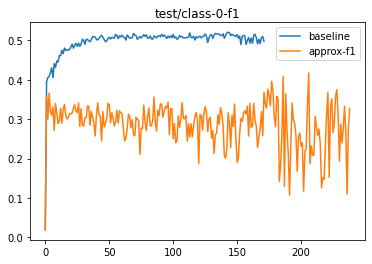

baseline:                   tag  epoch     value
2407  test/class-1-f1    171  0.533968
approx:                   tag  epoch     value
3345  test/class-1-f1    238  0.108209


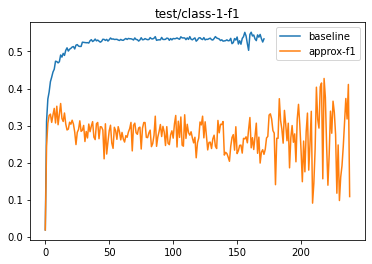

baseline:                   tag  epoch     value
3611  test/class-2-f1    171  0.319817
approx:                   tag  epoch     value
5018  test/class-2-f1    238  0.197898


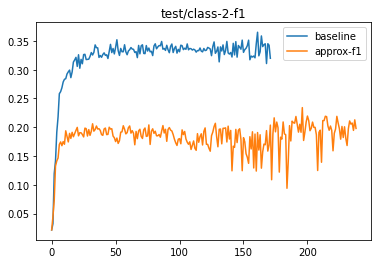

baseline:                   tag  epoch     value
4815  test/class-3-f1    171  0.293128
approx:                   tag  epoch     value
6691  test/class-3-f1    238  0.161931


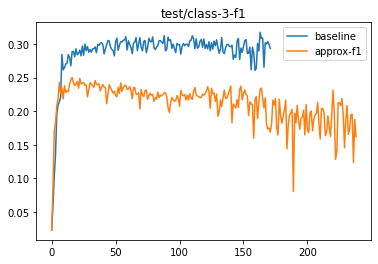

baseline:                   tag  epoch     value
6019  test/class-4-f1    171  0.393064
approx:                   tag  epoch    value
8364  test/class-4-f1    238  0.21975


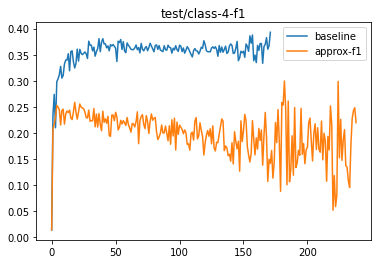

baseline:                   tag  epoch     value
7223  test/class-5-f1    171  0.359511
approx:                    tag  epoch     value
10037  test/class-5-f1    238  0.252252


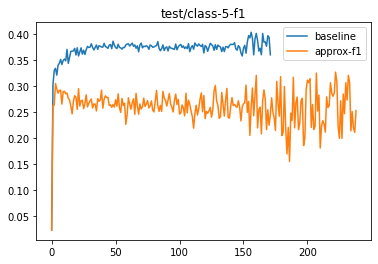

baseline:                   tag  epoch     value
8427  test/class-6-f1    171  0.473837
approx:                    tag  epoch     value
11710  test/class-6-f1    238  0.351351


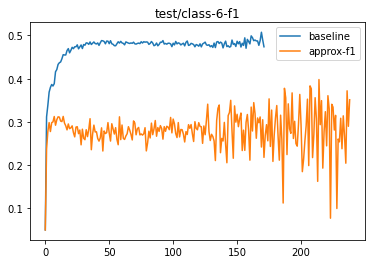

baseline:                   tag  epoch  value
9631  test/class-7-f1    171  0.475
approx:                    tag  epoch     value
13383  test/class-7-f1    238  0.263077


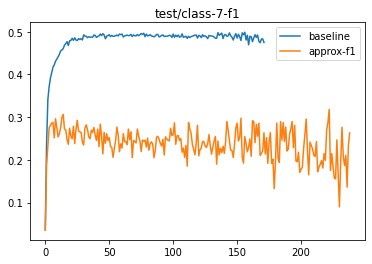

baseline:                    tag  epoch     value
10835  test/class-8-f1    171  0.552964
approx:                    tag  epoch     value
15056  test/class-8-f1    238  0.288693


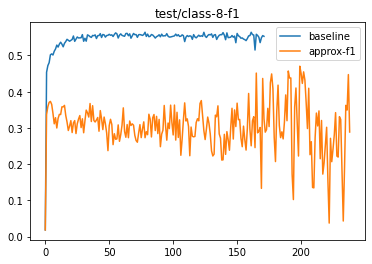

baseline:                    tag  epoch   value
12039  test/class-9-f1    171  0.3607
approx:                    tag  epoch     value
16729  test/class-9-f1    238  0.068506


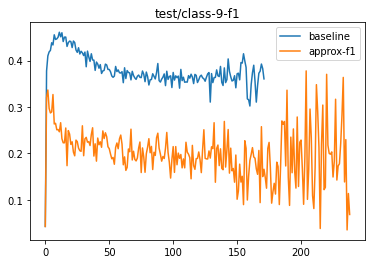

In [28]:
for i in range(10): 
    metric = "test/class-" + str(i) + "-f1"
    compare(baseline_imb_df, wt_approx_f1_imb_df, metric=metric)

## class-wise precision

baseline:                          tag  epoch     value
1375  test/class-0-precision    171  0.487992
approx:                          tag  epoch     value
1911  test/class-0-precision    238  0.705298


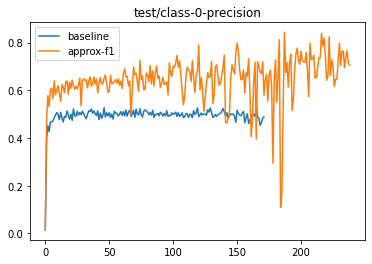

baseline:                          tag  epoch     value
2579  test/class-1-precision    171  0.470633
approx:                          tag  epoch     value
3584  test/class-1-precision    238  0.805556


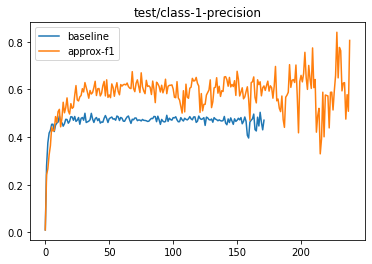

baseline:                          tag  epoch     value
3783  test/class-2-precision    171  0.372836
approx:                          tag  epoch     value
5257  test/class-2-precision    238  0.115077


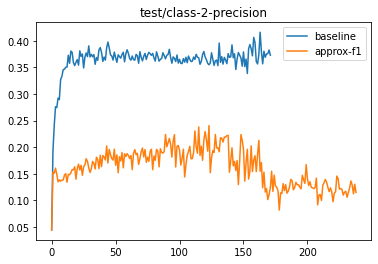

baseline:                          tag  epoch     value
4987  test/class-3-precision    171  0.282146
approx:                          tag  epoch     value
6930  test/class-3-precision    238  0.132569


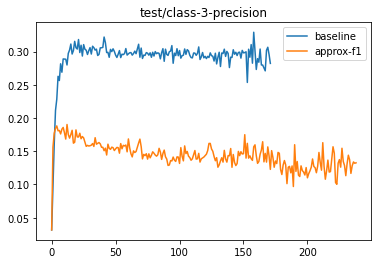

baseline:                          tag  epoch     value
6191  test/class-4-precision    171  0.353883
approx:                          tag  epoch     value
8603  test/class-4-precision    238  0.360731


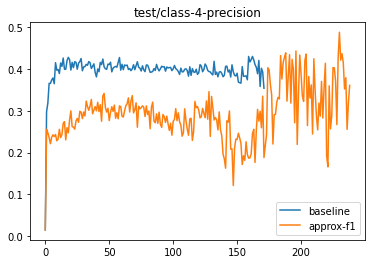

baseline:                          tag  epoch     value
7395  test/class-5-precision    171  0.429764
approx:                           tag  epoch     value
10276  test/class-5-precision    238  0.506024


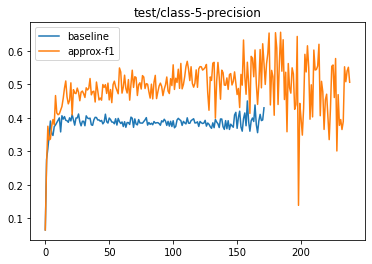

baseline:                          tag  epoch     value
8599  test/class-6-precision    171  0.459586
approx:                           tag  epoch    value
11949  test/class-6-precision    238  0.49278


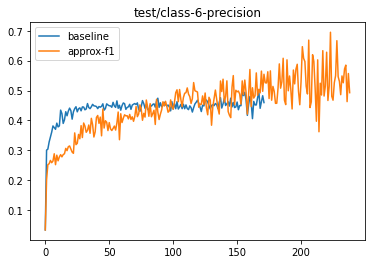

baseline:                          tag  epoch     value
9803  test/class-7-precision    171  0.429032
approx:                           tag  epoch  value
13622  test/class-7-precision    238   0.57


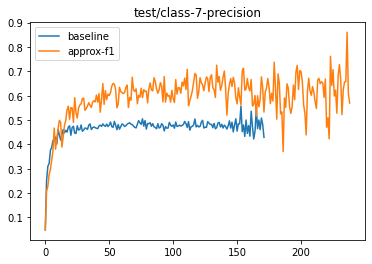

baseline:                           tag  epoch     value
11007  test/class-8-precision    171  0.537807
approx:                           tag  epoch     value
15295  test/class-8-precision    238  0.728745


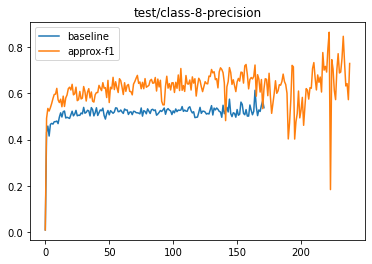

baseline:                           tag  epoch    value
12211  test/class-9-precision    171  0.55144
approx:                           tag  epoch     value
16968  test/class-9-precision    238  0.705882


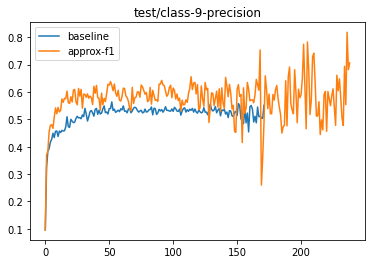

In [29]:
for i in range(10): 
    metric = "test/class-" + str(i) + "-precision"
    compare(baseline_imb_df, wt_approx_f1_imb_df, metric=metric)

## class-wise recall

baseline:                       tag  epoch  value
1547  test/class-0-recall    171  0.508
approx:                       tag  epoch  value
2150  test/class-0-recall    238  0.213


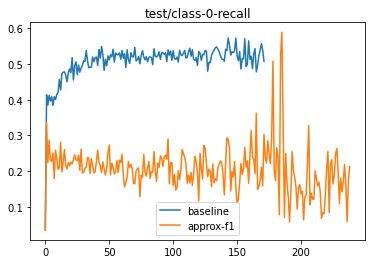

baseline:                       tag  epoch  value
2751  test/class-1-recall    171  0.617
approx:                       tag  epoch  value
3823  test/class-1-recall    238  0.058


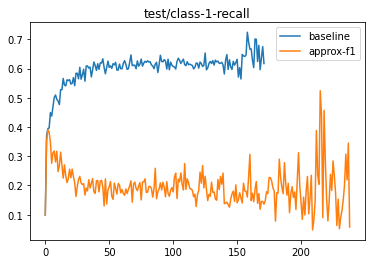

baseline:                       tag  epoch  value
3955  test/class-2-recall    171   0.28
approx:                       tag  epoch  value
5496  test/class-2-recall    238  0.706


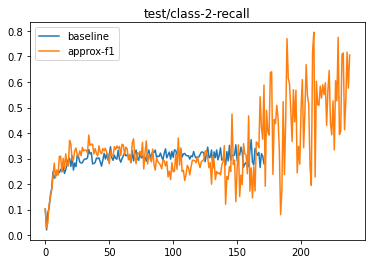

baseline:                       tag  epoch  value
5159  test/class-3-recall    171  0.305
approx:                       tag  epoch  value
7169  test/class-3-recall    238  0.208


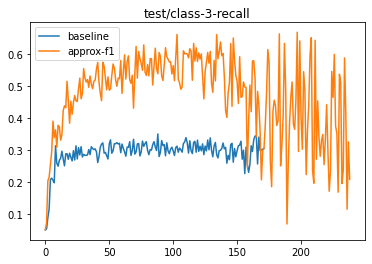

baseline:                       tag  epoch  value
6363  test/class-4-recall    171  0.442
approx:                       tag  epoch  value
8842  test/class-4-recall    238  0.158


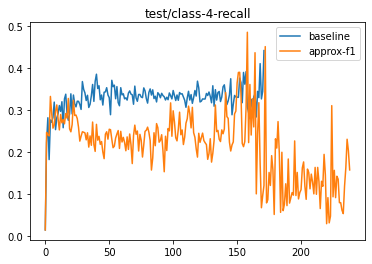

baseline:                       tag  epoch  value
7567  test/class-5-recall    171  0.309
approx:                        tag  epoch  value
10515  test/class-5-recall    238  0.168


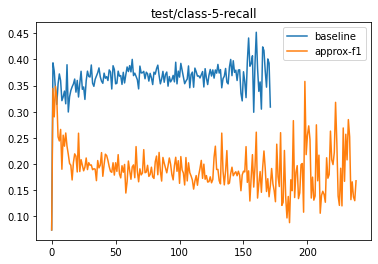

baseline:                       tag  epoch  value
8771  test/class-6-recall    171  0.489
approx:                        tag  epoch  value
12188  test/class-6-recall    238  0.273


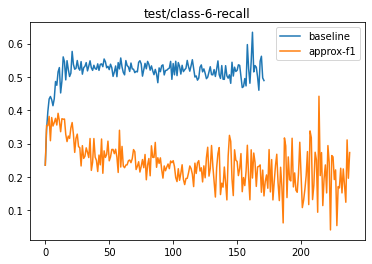

baseline:                       tag  epoch  value
9975  test/class-7-recall    171  0.532
approx:                        tag  epoch  value
13861  test/class-7-recall    238  0.171


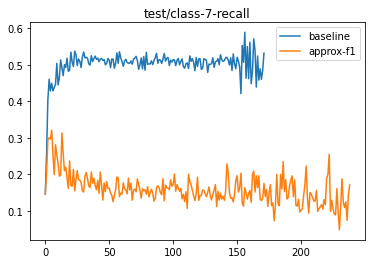

baseline:                        tag  epoch  value
11179  test/class-8-recall    171  0.569
approx:                        tag  epoch  value
15534  test/class-8-recall    238   0.18


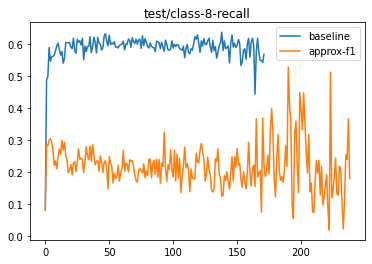

baseline:                        tag  epoch  value
12383  test/class-9-recall    171  0.268
approx:                        tag  epoch  value
17207  test/class-9-recall    238  0.036


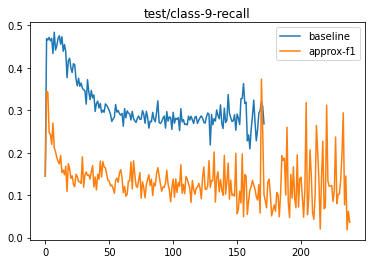

In [30]:
for i in range(10): 
    metric = "test/class-" + str(i) + "-recall"
    compare(baseline_imb_df, wt_approx_f1_imb_df, metric=metric)

## how are the confusion values per class moving? 

baseline:                    tag  epoch  value
11867  test/class-9-TP    171  268.0
approx:                    tag  epoch  value
16490  test/class-9-TP    238   36.0


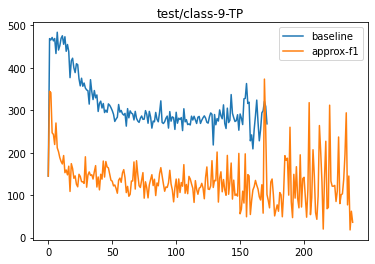

baseline:                    tag  epoch  value
11523  test/class-9-FP    171  218.0
approx:                    tag  epoch  value
16012  test/class-9-FP    238   15.0


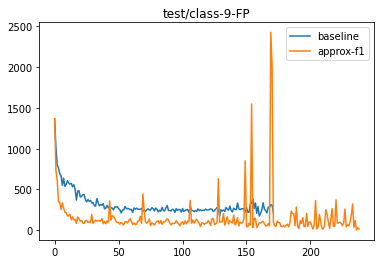

baseline:                    tag  epoch   value
11695  test/class-9-TN    171  4051.0
approx:                    tag  epoch   value
16251  test/class-9-TN    238  2135.0


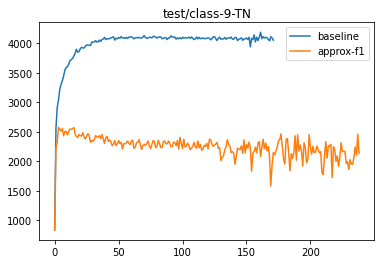

baseline:                    tag  epoch  value
11351  test/class-9-FN    171  732.0
approx:                    tag  epoch  value
15773  test/class-9-FN    238  964.0


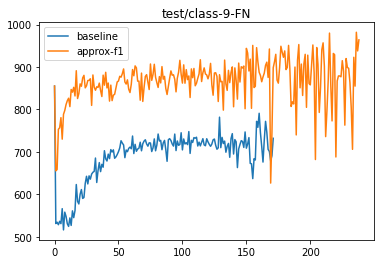

In [33]:
metric = "test/class-" + str(9) + "-TP"
compare(baseline_imb_df, wt_approx_f1_imb_df, metric=metric)
metric = "test/class-" + str(9) + "-FP"
compare(baseline_imb_df, wt_approx_f1_imb_df, metric=metric)
metric = "test/class-" + str(9) + "-TN"
compare(baseline_imb_df, wt_approx_f1_imb_df, metric=metric)
metric = "test/class-" + str(9) + "-FN"
compare(baseline_imb_df, wt_approx_f1_imb_df, metric=metric)